In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_log_error, mean_squared_error
import datetime
import time

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [75]:
train = pd.read_csv(r"E:\Data science\DataHack\Analytics Vidhya\Job_a_thon_170921\TRAIN.csv",parse_dates=['Date'])
test = pd.read_csv(r"E:\Data science\DataHack\Analytics Vidhya\Job_a_thon_170921\TEST_FINAL.csv",parse_dates=['Date'])

In [3]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
train.shape

(188340, 10)

In [5]:
train.describe(include = 'all')

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,516,NaN,2,NaN,NaN
top,T1181828,NaN,S1,L1,R1,2019-01-22 00:00:00,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,365,NaN,104051,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-05-31 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,NaN,0.131783,NaN,68.205692,42784.327982
std,NaN,105.366308,NaN,NaN,NaN,NaN,0.338256,NaN,30.467415,18456.708302
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,NaN,0.000000,NaN,48.000000,30426.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [7]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [8]:
test.shape

(22265, 8)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             22265 non-null  object        
 1   Store_id       22265 non-null  int64         
 2   Store_Type     22265 non-null  object        
 3   Location_Type  22265 non-null  object        
 4   Region_Code    22265 non-null  object        
 5   Date           22265 non-null  datetime64[ns]
 6   Holiday        22265 non-null  int64         
 7   Discount       22265 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.4+ MB


## 1. Data Preprocessing

### 1.1 Missing Values

In [11]:
# 0 missing Values
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [12]:
# 0 missing values
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

### 1.2 Check Train-Test Distribution

In [13]:
train.Store_id.unique().shape # 365 unique stores

(365,)

In [14]:
test.Store_id.unique().shape

(365,)

In [15]:
train.Store_Type.value_counts(normalize = True), test.Store_Type.value_counts(normalize = True)

(S1    0.471233
 S4    0.243836
 S2    0.153425
 S3    0.131507
 Name: Store_Type, dtype: float64,
 S1    0.471233
 S4    0.243836
 S2    0.153425
 S3    0.131507
 Name: Store_Type, dtype: float64)

In [16]:
train.Location_Type.value_counts(normalize = True), test.Location_Type.value_counts(normalize = True)

(L1    0.452055
 L2    0.257534
 L3    0.158904
 L5    0.073973
 L4    0.057534
 Name: Location_Type, dtype: float64,
 L1    0.452055
 L2    0.257534
 L3    0.158904
 L5    0.073973
 L4    0.057534
 Name: Location_Type, dtype: float64)

In [17]:
train.Region_Code.value_counts(normalize = True) ,test.Region_Code.value_counts(normalize = True)

(R1    0.339726
 R2    0.287671
 R3    0.235616
 R4    0.136986
 Name: Region_Code, dtype: float64,
 R1    0.339726
 R2    0.287671
 R3    0.235616
 R4    0.136986
 Name: Region_Code, dtype: float64)

In [18]:
train.Holiday.value_counts(normalize = True), test.Holiday.value_counts(normalize = True)

(0    0.868217
 1    0.131783
 Name: Holiday, dtype: float64,
 0    0.967213
 1    0.032787
 Name: Holiday, dtype: float64)

In [19]:
train.Discount.value_counts(normalize = True), test.Discount.value_counts(normalize = True)

(No     0.552464
 Yes    0.447536
 Name: Discount, dtype: float64,
 No     0.573681
 Yes    0.426319
 Name: Discount, dtype: float64)

### 1.3 Check for Duplicates

In [20]:
# 0 duplicates in train data.
train[train.duplicated()].shape[0]

0

In [21]:
# 0 duplicates in test data.
test[test.duplicated()].shape[0]

0

### 1.4 Check for Outliers and Normal Distribution of sales & Orders column

<AxesSubplot:xlabel='Sales', ylabel='Count'>

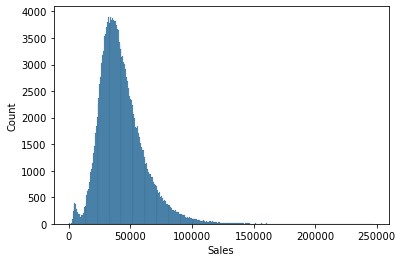

In [22]:
sns.histplot(train.Sales) # 2 peaks can be seen in the distribution

<AxesSubplot:xlabel='Sales', ylabel='Count'>

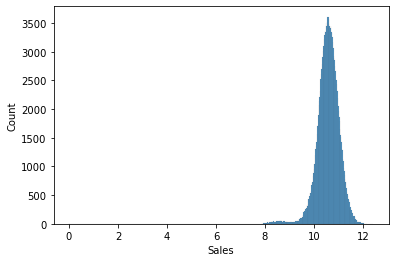

In [23]:
sns.histplot(np.log1p(train.Sales))

In [387]:
IQR = np.quantile(train.Sales , 0.75) - np.quantile(train.Sales , 0.25)
print(np.quantile(train.Sales , 0.75) + 1.5*IQR)

84133.5


In [388]:
len(train[train['Sales'] > 84133.5])

5843

In [389]:
5843/train.shape[0]

0.031023680577678667

<AxesSubplot:xlabel='Sales'>

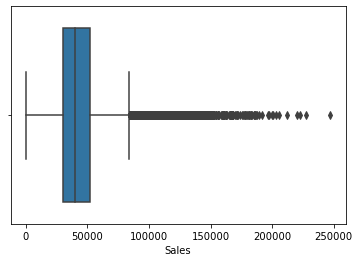

In [23]:
sns.boxplot(train.Sales)

<AxesSubplot:xlabel='Sales'>

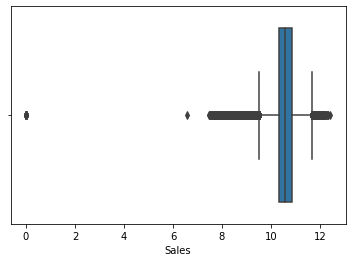

In [24]:
sns.boxplot(np.log1p(train.Sales))

<AxesSubplot:xlabel='#Order', ylabel='Count'>

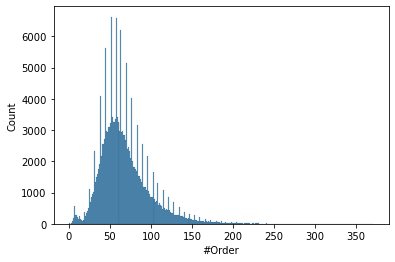

In [25]:
sns.histplot(train['#Order'])

In [391]:
IQR = np.quantile(train['#Order'] , 0.75) - np.quantile(train['#Order'] , 0.25)
print(np.quantile(train['#Order'] , 0.75) + 1.5*IQR)

133.0


In [393]:
len(train[train['#Order'] > 133.0])

7089

In [394]:
7089/train['#Order'].shape[0]

0.03763937559732399

<AxesSubplot:xlabel='#Order'>

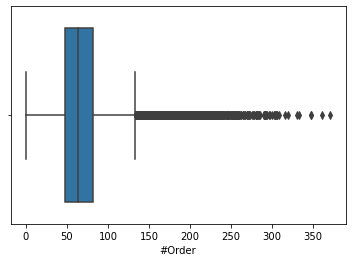

In [26]:
sns.boxplot(train['#Order'])

<AxesSubplot:xlabel='#Order'>

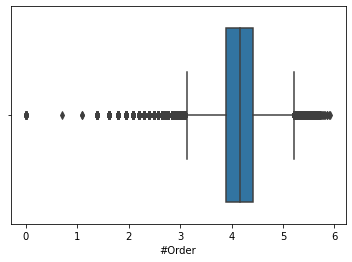

In [27]:
sns.boxplot(np.log1p(train['#Order']))

## Feature Engineering

In [24]:
# Creating Features from date column.

def create_date_features(df):
    df['Year'] =  df['Date'].dt.year
    df['Month'] =  df['Date'].dt.month
    df['Day'] =  df['Date'].dt.day
    df['Dayofweek'] =  df['Date'].dt.dayofweek
    df['DayOfyear'] =  df['Date'].dt.dayofyear
    df['Week'] =  df['Date'].dt.week 
    df['Quarter'] =  df['Date'].dt.quarter
    df['Is_week_start'] = np.where(df['Dayofweek'].isin([0]),1,0)
    df['Is_month_start'] =  np.where(df['Date'].dt.is_month_start,1,0)
    df['Is_month_end'] =  np.where(df['Date'].dt.is_month_end,1,0) 
    df['Is_quarter_start'] =  np.where(df['Date'].dt.is_quarter_start,1,0)
    df['Is_quarter_end'] =  np.where(df['Date'].dt.is_quarter_end,1,0) 
    df['Is_year_start'] =  np.where(df['Date'].dt.is_year_start,1,0) 
    df['Is_year_end'] =  np.where(df['Date'].dt.is_year_end,1,0)
    df['Semester'] = np.where(df['Quarter'].isin([1,2]),1,2)   
    df['Is_weekday'] = np.where(df['Dayofweek'].isin([0,1,2,3,4]),1,0)
    df['Days_in_month'] =  df['Date'].dt.days_in_month
    
    return df

In [25]:
train = create_date_features(train)
test = create_date_features(test)

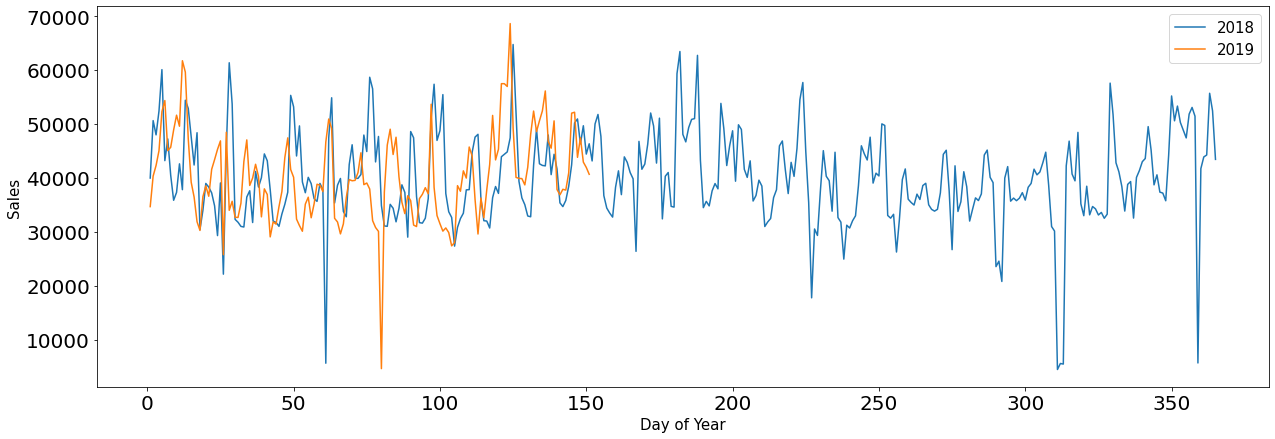

In [26]:
Daily_Sales_2018 = train[train.Year == 2018].groupby('DayOfyear')['Sales'].median()
Daily_Sales_2019 = train[train.Year == 2019].groupby('DayOfyear')['Sales'].median()

plt.figure(figsize=(21,7))
plt.plot(Daily_Sales_2018.index, Daily_Sales_2018.values)
plt.plot(Daily_Sales_2019.index, Daily_Sales_2019.values)

plt.xlabel('Day of Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks( fontsize=20)
plt.legend(('2018','2019'),prop= {'size':15})

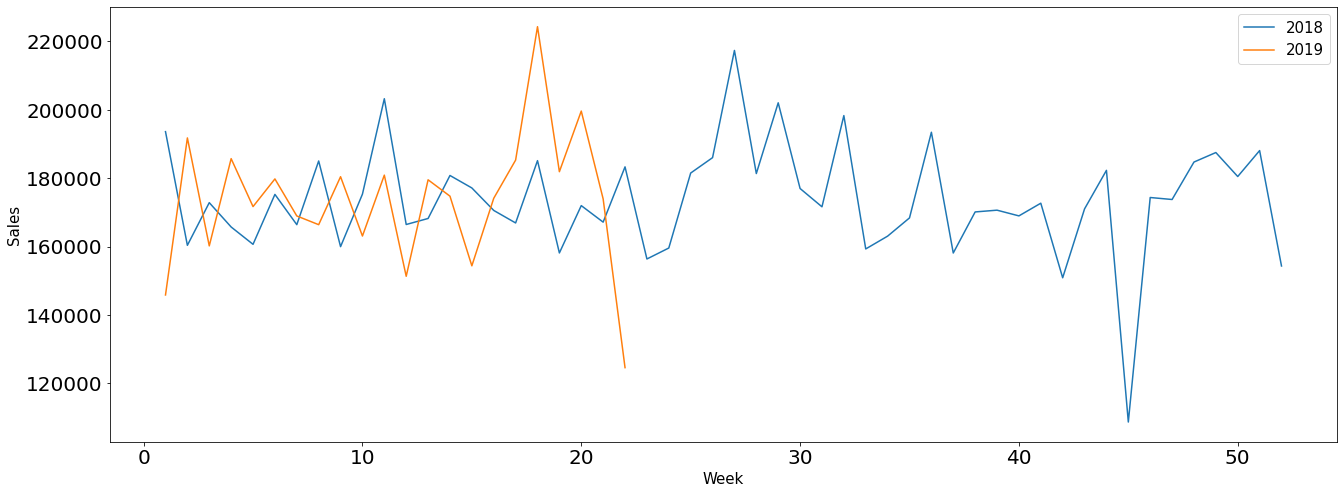

In [27]:
Daily_Sales_2018 = train[train.Year == 2018].groupby('Week')['#Order'].sum()
Daily_Sales_2019 = train[train.Year == 2019].groupby('Week')['#Order'].sum()

plt.figure(figsize=(22,8))
plt.plot(Daily_Sales_2018.index, Daily_Sales_2018.values)
plt.plot(Daily_Sales_2019.index, Daily_Sales_2019.values)

plt.xlabel('Week', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks( fontsize=20)
plt.legend(('2018','2019'),prop= {'size':15})

In [28]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_week_start,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekday,Days_in_month
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31


In [29]:
# train['Stores_with_High_Sales'] = np.where(train.Store_id.isin([173,354,153,160,146,312,126,337,175]),1,0)
# test['Stores_with_High_Sales'] = np.where(test.Store_id.isin([173,354,153,160,146,312,126,337,175]),1,0)

# train['Stores_with_Low_Sales'] = np.where(train.Store_id.isin([83,67,71,77,289,136,216,186,98,79,226,88,62,293,310,230]),1,0)
# test['Stores_with_Low_Sales'] = np.where(test.Store_id.isin([83,67,71,77,289,136,216,186,98,79,226,88,62,293,310,230]),1,0)

In [30]:
train_x = train.loc[:,train.columns!='Sales']

### Creating Validation Set
- Train set:- Data before April 2019
- Validation Set:- Data After April 2019
- KFold CV on train

In [31]:
tr_x = train_x[train.Date<'2019-04-01']
val_x = train_x[train.Date>='2019-04-01']
tr_y = train[train.Date<'2019-04-01']['Sales']
val_y = train[train.Date>='2019-04-01']['Sales']

### Generating New features from Order column

In [32]:
# Total Weekly orders based on store_type.
abc = tr_x.groupby(['Store_Type','Week'])['#Order'].sum().reset_index()
abc.columns = ['Store_Type','Week','Store_weekly_Orders']
tr_x = tr_x.merge(abc, on = ['Store_Type','Week'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_Type','Week'], how = 'left')
test = test.merge(abc, on = ['Store_Type','Week'], how = 'left')

# Total orders on weekends of every week in a month based on store_type.
abc = tr_x.groupby(['Store_Type','Week','Is_week_start'])['#Order'].sum().reset_index()
abc.columns = ['Store_Type','Week','Is_week_start','Store_weekend_Orders']
tr_x = tr_x.merge(abc, on = ['Store_Type','Week','Is_week_start'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_Type','Week','Is_week_start'], how = 'left')
test = test.merge(abc, on = ['Store_Type','Week','Is_week_start'], how = 'left')

# Total Orders in every week based on store_type & Location_id.
abc = tr_x.groupby(['Store_Type','Location_Type','Week'])['#Order'].sum().reset_index()
abc.columns = ['Store_Type','Location_Type','Week','Store_Location_weekly_Orders']
tr_x = tr_x.merge(abc, on = ['Store_Type','Location_Type','Week'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_Type','Location_Type','Week'], how = 'left')
test = test.merge(abc, on = ['Store_Type','Location_Type','Week'], how = 'left')

# Total orders on weekends of every week in a month based on store_type & Location_id.
abc = tr_x.groupby(['Store_Type','Location_Type','Week','Is_week_start'])['#Order'].sum().reset_index()
abc.columns = ['Store_Type','Location_Type','Week','Is_week_start','Store_Location_weekend_Orders']
tr_x = tr_x.merge(abc, on = ['Store_Type','Location_Type','Week','Is_week_start'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_Type','Location_Type','Week','Is_week_start'], how = 'left')
test = test.merge(abc, on = ['Store_Type','Location_Type','Week','Is_week_start'], how = 'left')

In [33]:
# New Features using Store_Id column & Orders:

# Total Weekly orders by Stores.
abc = tr_x.groupby(['Store_id','Week'])['#Order'].sum().reset_index()
abc.columns = ['Store_id','Week','Storeid_weekly_Orders']
tr_x = tr_x.merge(abc, on = ['Store_id','Week'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week'], how = 'left')

# Total orders on weekends of every week in a month based on store_type.
abc = tr_x.groupby(['Store_id','Week','Is_week_start'])['#Order'].sum().reset_index()
abc.columns = ['Store_id','Week','Is_week_start','Storeid_weekend_Orders']
tr_x = tr_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')

# Avg Weekly orders by Stores.
abc = tr_x.groupby(['Store_id','Week'])['#Order'].mean().reset_index()
abc.columns = ['Store_id','Week','Storeid_weekly_avgOrders']
tr_x = tr_x.merge(abc, on = ['Store_id','Week'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week'], how = 'left')

# Avg orders on weekends of every week in a month based on store_type.
abc = tr_x.groupby(['Store_id','Week','Is_week_start'])['#Order'].mean().reset_index()
abc.columns = ['Store_id','Week','Is_week_start','Storeid_weekend_avgOrders']
tr_x = tr_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')

# Min Weekly orders by Stores.
abc = tr_x.groupby(['Store_id','Week'])['#Order'].min().reset_index()
abc.columns = ['Store_id','Week','Storeid_weekly_minOrders']
tr_x = tr_x.merge(abc, on = ['Store_id','Week'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week'], how = 'left')

# min orders on weekends of every week in a month based on store_type.
abc = tr_x.groupby(['Store_id','Week','Is_week_start'])['#Order'].min().reset_index()
abc.columns = ['Store_id','Week','Is_week_start','Storeid_weekend_minOrders']
tr_x = tr_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')

# Max Weekly orders by Stores.
abc = tr_x.groupby(['Store_id','Week'])['#Order'].max().reset_index()
abc.columns = ['Store_id','Week','Storeid_weekly_maxOrders']
tr_x = tr_x.merge(abc, on = ['Store_id','Week'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week'], how = 'left')

# max orders on weekends of every week in a month based on store_type.
abc = tr_x.groupby(['Store_id','Week','Is_week_start'])['#Order'].max().reset_index()
abc.columns = ['Store_id','Week','Is_week_start','Storeid_weekend_maxOrders']
tr_x = tr_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')

# Count of discounts offered by each store in every week
abc = tr_x.groupby(['Store_id','Week'])['Discount'].count().reset_index()
abc.columns = ['Store_id','Week','Storeid_week_discount_count']
tr_x = tr_x.merge(abc, on = ['Store_id','Week'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week'], how = 'left')

# Count of discounts offered by each store in every month
abc = tr_x.groupby(['Store_id','Month'])['Discount'].count().reset_index()
abc.columns = ['Store_id','Month','Storeid_Month_discount_count']
tr_x = tr_x.merge(abc, on = ['Store_id','Month'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Month'], how = 'left')
test = test.merge(abc, on = ['Store_id','Month'], how = 'left')

# Count of discounts on weekends of every week in a month for every store.
abc = tr_x.groupby(['Store_id','Week','Is_week_start'])['Discount'].count().reset_index()
abc.columns = ['Store_id','Week','Is_week_start','Storeid_weekend_Discount_count']
tr_x = tr_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
val_x = val_x.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')
test = test.merge(abc, on = ['Store_id','Week','Is_week_start'], how = 'left')

### Feature Scaling

In [34]:
tr_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166075 entries, 0 to 166074
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ID                              166075 non-null  object        
 1   Store_id                        166075 non-null  int64         
 2   Store_Type                      166075 non-null  object        
 3   Location_Type                   166075 non-null  object        
 4   Region_Code                     166075 non-null  object        
 5   Date                            166075 non-null  datetime64[ns]
 6   Holiday                         166075 non-null  int64         
 7   Discount                        166075 non-null  object        
 8   #Order                          166075 non-null  int64         
 9   Year                            166075 non-null  int64         
 10  Month                           166075 non-null  int64  

In [37]:
numcols = list(tr_x.select_dtypes(exclude = 'object').columns)
for i in ['#Order','Store_id','Year','Month','Day','DayOfyear','Dayofweek','Week','Quarter'
         ,'Is_week_start','Is_month_start','Is_month_end','Is_quarter_start','Is_quarter_end','Is_year_start',
          'Is_year_end','Semester','Is_weekday','Days_in_month']:
    print(i)
    numcols.remove(i)
numcols.remove('Date')

#Order
Store_id
Year
Month
Day
DayOfyear
Dayofweek
Week
Quarter
Is_week_start
Is_month_start
Is_month_end
Is_quarter_start
Is_quarter_end
Is_year_start
Is_year_end
Semester
Is_weekday
Days_in_month


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(tr_x[numcols])
tr_x[numcols] = scaler.transform(tr_x[numcols])
val_x[numcols] = scaler.transform(val_x[numcols])
test[numcols] = scaler.transform(test[numcols])

In [39]:
tr_x.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Year,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_week_start,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekday,Days_in_month,Store_weekly_Orders,Store_weekend_Orders,Store_Location_weekly_Orders,Store_Location_weekend_Orders,Storeid_weekly_Orders,Storeid_weekend_Orders,Storeid_weekly_avgOrders,Storeid_weekend_avgOrders,Storeid_weekly_minOrders,Storeid_weekend_minOrders,Storeid_weekly_maxOrders,Storeid_weekend_maxOrders,Storeid_week_discount_count,Storeid_Month_discount_count,Storeid_weekend_Discount_count
0,T1000001,1,S1,L3,R1,2018-01-01,1.0,Yes,9,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31,0.888297,0.126830,0.269059,0.042746,0.239836,0.029098,0.160671,0.121575,0.044335,0.030822,0.158879,0.178674,1.0,1.0,0.090909
1,T1000002,253,S4,L2,R1,2018-01-01,1.0,Yes,60,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31,0.756667,0.086692,0.862713,0.110169,0.404700,0.067623,0.293165,0.282534,0.295567,0.205479,0.246106,0.302594,1.0,1.0,0.090909
2,T1000003,252,S3,L2,R1,2018-01-01,1.0,Yes,42,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31,0.254562,0.028707,0.166792,0.021059,0.321522,0.043852,0.226319,0.183219,0.206897,0.143836,0.242991,0.187320,1.0,1.0,0.090909
3,T1000004,251,S2,L3,R1,2018-01-01,1.0,Yes,23,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31,0.161279,0.025197,0.097463,0.016254,0.176427,0.026230,0.109712,0.109589,0.113300,0.078767,0.109034,0.118156,1.0,1.0,0.090909
4,T1000005,250,S2,L3,R4,2018-01-01,1.0,Yes,62,2018,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,31,0.161279,0.025197,0.097463,0.016254,0.197687,0.043033,0.126799,0.179795,0.162562,0.147260,0.112150,0.178674,1.0,1.0,0.090909


## Feature Encoding

In [40]:
# One Hot Encoding
l = ['Store_Type','Location_Type','Region_Code']
tr_x = pd.get_dummies(tr_x, columns = l,drop_first=True)
val_x = pd.get_dummies(val_x, columns = l,drop_first=True)
test = pd.get_dummies(test, columns = l,drop_first=True)

In [41]:
tr_x['Discount'] = tr_x['Discount'].replace({'Yes':1,'No':0})
val_x['Discount'] = val_x['Discount'].replace({'Yes':1,'No':0})
test['Discount'] = test['Discount'].replace({'Yes':1,'No':0})

In [42]:
test.drop(columns = ['ID','Date'],inplace = True)

In [43]:
tr_x = tr_x.drop(columns = ['ID','#Order','Date'])
val_x = val_x.drop(columns = ['ID','#Order','Date'])

In [44]:
len(tr_x.columns)

45

## Model Building

In [45]:
val_score = []

In [46]:
# Linear Regresion
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(tr_x, tr_y)
valid_pred = reg.predict(val_x) ; train_pred = reg.predict(tr_x)
validation_score = mean_squared_log_error(val_y,np.absolute(valid_pred))*1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y,np.absolute(train_pred))*1000
print("Validation_Score: ",validation_score,"Train Score: ",train_score)

Validation_Score:  104.15966911586796 Train Score:  84.365680439081


In [47]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth = 12)
dtree.fit(tr_x, tr_y)
valid_pred = dtree.predict(val_x) ; train_pred = dtree.predict(tr_x)
validation_score = mean_squared_log_error(val_y,np.absolute(valid_pred))*1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y,np.absolute(train_pred))*1000
print("Validation_Score: ",validation_score,"Train Score: ",train_score)

Validation_Score:  107.87549580575141 Train Score:  34.94978823755782


In [48]:
# RandomForest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(tr_x, tr_y)
valid_pred = rf.predict(val_x) ; train_pred = rf.predict(tr_x)
validation_score = mean_squared_log_error(val_y,np.absolute(valid_pred))*1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y,np.absolute(train_pred))*1000
print("Validation_Score: ",validation_score,"Train Score: ",train_score)

Validation_Score:  105.44584610689517 Train Score:  11.222524574033994


In [49]:
# AdaBoost

from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
ad.fit(tr_x, tr_y)
valid_pred = ad.predict(val_x) ; train_pred = ad.predict(tr_x)
validation_score = mean_squared_log_error(val_y,valid_pred)*1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y,train_pred)*1000
print("Validation_Score: ",validation_score,"Train Score: ",train_score)

Validation_Score:  146.25169239754885 Train Score:  155.8171719388564


In [50]:
# XGBoost

from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(tr_x, tr_y)
valid_pred = xgr.predict(val_x) ; train_pred = xgr.predict(tr_x)
validation_score = mean_squared_log_error(val_y,np.absolute(valid_pred))*1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y,np.absolute(train_pred))*1000
print("Validation_Score: ",validation_score,"Train Score: ",train_score)

Validation_Score:  102.18598116728776 Train Score:  36.97855395662679


In [51]:
# LightGBM

from lightgbm import LGBMRegressor,plot_importance,plot_tree
lgb = LGBMRegressor(n_estimators = 100,learning_rate = 0.1,min_child_samples=20,subsample=1.0,colsample_bytree=1.0,num_leaves=20)
lgb.fit(tr_x, tr_y)
valid_pred = lgb.predict(val_x) ; train_pred = lgb.predict(tr_x)
validation_score = mean_squared_log_error(val_y,np.absolute(valid_pred))*1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y,np.absolute(train_pred))*1000
print("Validation_Score: ",validation_score,"Train Score: ",train_score)

Validation_Score:  97.97446562035019 Train Score:  45.04085165235012


In [55]:
val_score

[104.15966911586796,
 107.87549580575141,
 105.44584610689517,
 146.25169239754885,
 102.18598116728776,
 97.97446562035019]

In [56]:
# Compare Models
compare = pd.DataFrame({'Models':['LinearRegression','DecisionTree','RandomForest','AdaBoost','XGBoost','LightGBM'],'MSLE':val_score})
compare

,Models,MSLE
0,LinearRegression,104.159669
1,DecisionTree,107.875496
2,RandomForest,105.445846
3,AdaBoost,146.251692
4,XGBoost,102.185981
5,LightGBM,97.974466


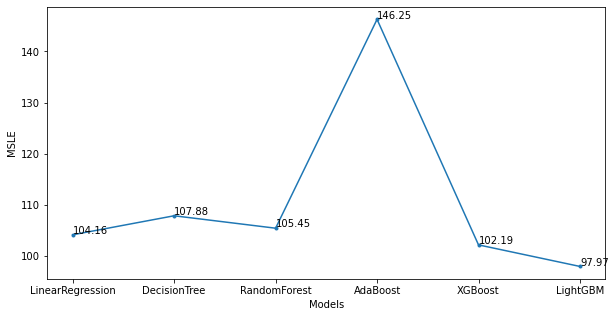

In [67]:
plt.subplots(figsize=(10,5))
plt.plot(compare.Models,compare.MSLE,marker = '.')

# plt.legend()

for x,y in zip(compare.Models,compare.MSLE):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points",
                xytext=(0,1)) 

plt.xticks(fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Models')
plt.ylabel('MSLE')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

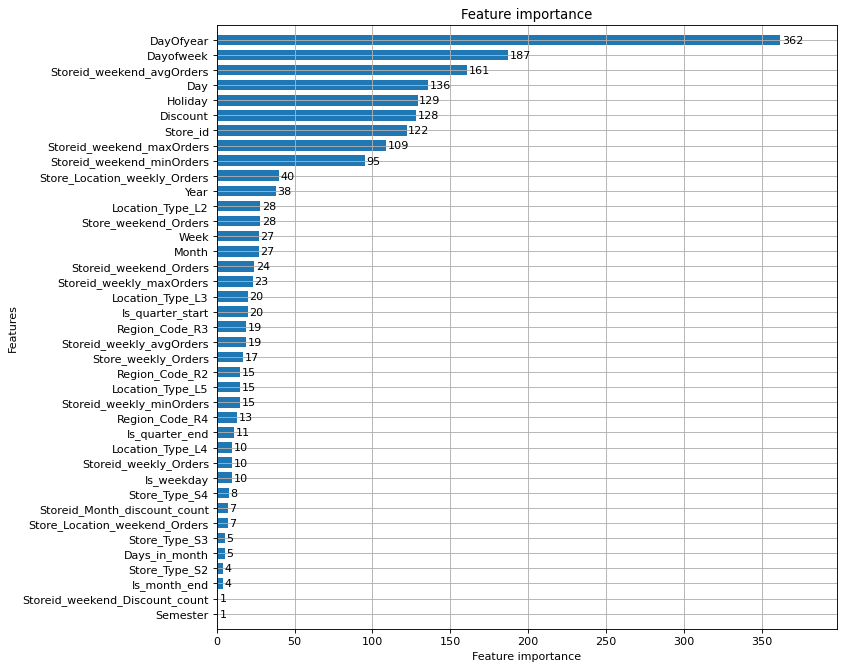

In [71]:
plot_importance(lgb, height = 0.7, dpi =80, figsize = (10,10))

In [ ]:
tr2_x = tr_x.copy()
tr2_y = pd.DataFrame(tr_y.copy())
tr2_y['Year'] = tr2_x['Year']
tr2_y['DayOfyear'] = tr2_x['DayOfyear']

tr2_y['Prediciton'] = train_pred

In [27]:
val2_x = val_x.copy()
val2_y = pd.DataFrame(val_y.copy())
val2_y['Year'] = val_x['Year']
val2_y['DayOfyear'] = val_x['DayOfyear']

val2_y['Prediciton'] = valid_pred

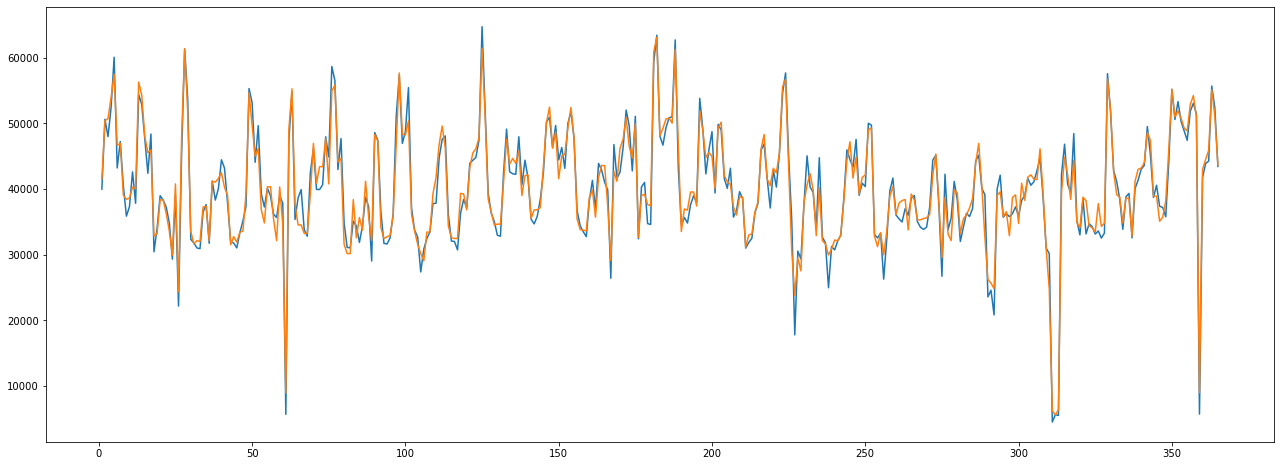

In [28]:
# To compare actual & Predicted values.
Daily_Sales_2018 = tr2_y[tr2_y.Year == 2018].groupby('DayOfyear')['Sales'].median()
pred_Daily_Sales_2018 = tr2_y[tr2_y.Year == 2018].groupby('DayOfyear')['Prediciton'].median()
#Daily_Sales_2019 = train[train.Year == 2019].groupby('DayOfyear')['Sales'].median()


plt.figure(figsize=(22,8))
plt.plot(Daily_Sales_2018.index, Daily_Sales_2018.values)
plt.plot(pred_Daily_Sales_2018.index, pred_Daily_Sales_2018.values)

## KFold Cross Validation

In [70]:
# KFOLD Cross Validation

# KFold Cross Validation
from sklearn.model_selection import KFold
Kfolds = KFold(n_splits=5, shuffle = True , random_state = 100)
i = 1
val_score = []
train_score = []
prediction_test = []

for train_index,val_index in Kfolds.split(tr_x, tr_y):
    x_train , x_val = tr_x.iloc[train_index], tr_x.iloc[val_index]
    y_train , y_val = tr_y.iloc[train_index], tr_y.iloc[val_index]
    
    lgbm = LGBMRegressor(n_estimators = 100,learning_rate = 0.1,min_child_samples=20,subsample=1.0,colsample_bytree=1.0,num_leaves=20)
    lgbm.fit(x_train, y_train)
    valid_pred = lgbm.predict(x_val) ; train_pred = lgbm.predict(x_train)
    test_pred = lgbm.predict(test)
    valid_score = mean_squared_log_error(y_val,np.absolute(valid_pred))*1000
    traindata_score = mean_squared_log_error(y_train,np.absolute(train_pred))*1000
    
    print("For CV = ",i)
    print("Validation_Score: ",valid_score,"Train Score: ",traindata_score)
    i = i+1
    val_score.append(valid_score) ; train_score.append(traindata_score)
    prediction_test.append(test_pred)
    
print("Mean MSLE for Validation: ",np.mean(val_score),"\nMean MSLE for TrainData: ",np.mean(train_score))

For CV =  1
Validation_Score:  42.34599893415937 Train Score:  46.01057857989701
For CV =  2
Validation_Score:  42.595192892277325 Train Score:  45.87844467065255
For CV =  3
Validation_Score:  46.917154800008966 Train Score:  46.276670191095214
For CV =  4
Validation_Score:  53.3367262704725 Train Score:  43.475591374766395
For CV =  5
Validation_Score:  44.84353622843254 Train Score:  45.16742269515519
Mean MSLE for Validation:  46.00772182507014 
Mean MSLE for TrainData:  45.36174150231327


## Submission

In [114]:
sub = pd.read_csv(r"E:\Data science\DataHack\Analytics Vidhya\Job_a_thon_170921\SAMPLE.csv")

In [115]:
sub.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [39]:
sub['Sales'] = np.absolute(lgb.predict(test))

In [116]:
sub['Sales'] =  pd.DataFrame({1:prediction_test[0],2:prediction_test[1],3:prediction_test[2],4:prediction_test[3],5:prediction_test[4]}).mean(axis = 1)

In [121]:
# sub['Sales'] = xgr.predict(test)

In [117]:
sub.head()

,ID,Sales
0,T1188341,64462.109935
1,T1188342,45236.621150
2,T1188343,75225.425413
3,T1188344,40137.937598
4,T1188345,43753.997026


In [118]:
len(sub[sub['Sales']<0])

0

In [119]:
sub.to_csv('Retail_Store_Sales14.csv', index=False)